**QUESTION _ 1**

**FIVE DATA INSIGHTS ARE -------------------**

1. The Average temperature of Autumns and Springs are nearly same over the years in different countries.

2. In India The Average Temperature Change in Ahemdabad is Greater than That of Bangalore.

3. The Average Temperature of new Delhi is increasing over the Years.

4. The Average Temperature Uncertainity of New Delhi is Unstable and it decreases over The Years.

5. The Average Temperature of Phillipins is greatest among all the countries.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [0]:
global_temp = pd.read_csv('/content/drive/My Drive/GlobalLandTemperaturesByMajorCity.csv')

In [0]:
global_temp = global_temp[['dt', 'City', 'AverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)
global_temp['City'] = global_temp['City']

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter' 
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

'''if global_temp.month >= 3 and global_temp.month <= 5:
    global_temp['season'] = global_temp['month'].apply('spring')
elif global_temp.month >= 6 and global_temp.month <= 8:
    global_temp['season'] = global_temp['month'].apply('summer')
elif global_temp.month>= 9 and global_temp.month <= 11:
    global_temp['season'] = global_temp['month'].apply('autumn')
else:
    global_temp['season'] = global_temp['month'].apply('winter')'''
    
    

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['AverageTemperature'].mean())


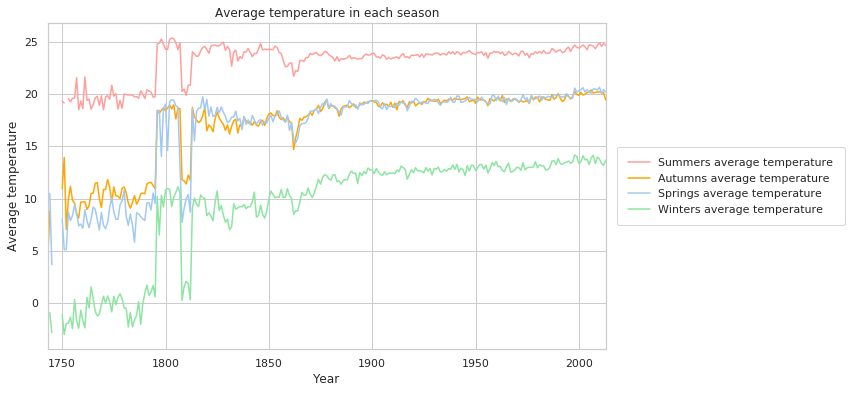

In [0]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='r')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='orange')
plt.plot(years, spring_temps, label='Springs average temperature', color='b')
plt.plot(years, winter_temps, label='Winters average temperature', color='g')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

# Tempearture change of Delhi over the years

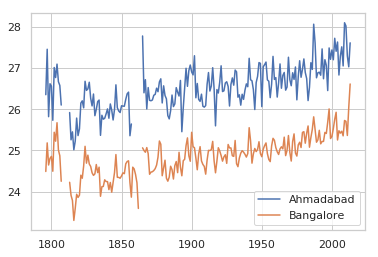

In [0]:
df= pd.read_csv('/content/drive/My Drive/GlobalLandTemperaturesByMajorCity.csv')
city1='Ahmadabad'
df_delhi = df[df['City']==city1]
combine = df[df['City']==city1].groupby( df_delhi['dt'].apply(lambda x: int(x[0:4]))).mean()
comb= combine['AverageTemperature']
plt.plot(comb)

city3='Bangalore'
df_delhi = df[df['City']==city3]
combine = df[df['City']==city3].groupby( df_delhi['dt'].apply(lambda x: int(x[0:4]))).mean()
comb= combine['AverageTemperature']
plt.plot(comb)
plt.legend([city1,city3])
plt.show()


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


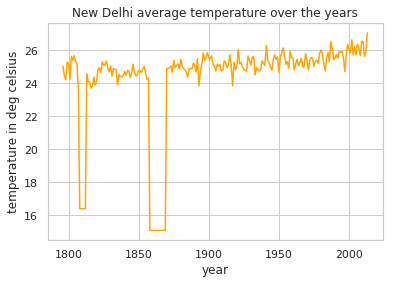

In [0]:
df_delhi['AverageTemperature'] = df_delhi['AverageTemperature'].fillna(method = 'ffill')
combined1 = df_delhi.groupby(df_delhi['dt'].apply(lambda x: int(x[0:4]))).mean()
temp=combined1['AverageTemperature']
plt.title('New Delhi average temperature over the years')
plt.ylabel('temperature in deg celsius')
plt.xlabel('year')
plt.plot(temp,color='orange')
plt.show()

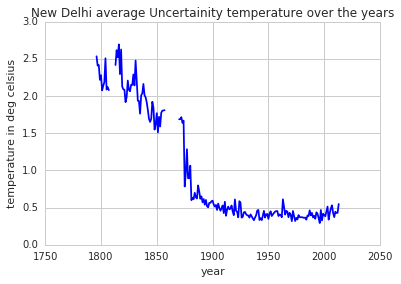

In [0]:
temp1=combined1['AverageTemperatureUncertainty']
plt.title('New Delhi average Uncertainity temperature over the years')
plt.ylabel('temperature in deg celsius')
plt.xlabel('year')
plt.plot(temp1,color='blue')
plt.show()

In [0]:
import math
import copy as cp
c=np.unique(df.Country)
count=np.zeros(len(c))
data=[]
for i in range(len(df.Country)):
    x=df.AverageTemperature[i]
    y=df.Country[i]
    if(not math.isnan(x)):
        idx=np.where(c==y)
        count[idx]+=x
for i in range(len(count)):
    count[i]=count[i]/(np.sum(df.Country==c[i]))                   


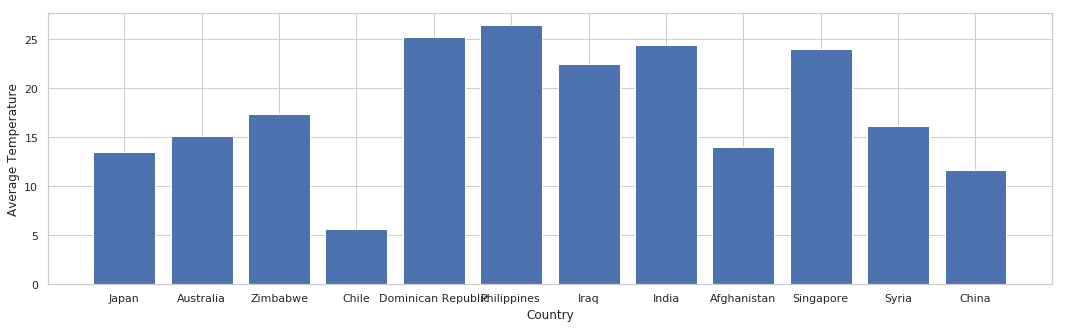

In [0]:
from numpy.random import randint
from numpy.random import shuffle
idx=np.arange(len(count))
shuffle(idx)
c=c[idx]; count=count[idx]
k=randint(0,len(count))
idx1=randint(0,len(count)-k)
idx2=randint(idx1,len(count))
f, ax = plt.subplots(figsize=(18,5))
plt.bar(c[idx1:idx2],count[idx1:idx2])
plt.xlabel('Country')
plt.ylabel('Average Temperature');

In [0]:
con_set = set(df.Country)

In [0]:
dic = {}
for i in range(len(df.Country)):
   if df.Country[i] in dic:
      dic[df.Country[i]].append(df.AverageTemperatureUncertainty[i])
   else:
      dic[df.Country[i]] = []
  

In [0]:
av = []
for i in con_set:
  p = list(dic[i])
  p = [x for x in p if x == x]
  av.append(p)
  

In [0]:
con_set = list(con_set)

In [0]:
di = {}
di["AverageTemperatureUncertainty"] = av
di["Country"] = con_set

In [0]:
ax = sns.boxplot(x="Country",y = "AverageTemperatureUncertainty",data = di)
ax.set(xlabel = "Country",ylabel = "AverageTemperatureUncertainty")
plt.show()

**INFERENCES AND STORY TELLING**

1. With The help of graph plot we can infer that The Average temperature of Autumns and Springs are nearly same over the years in different countries. The Temperature in summer is more and winter is less.

2. With the help of bar plot of average temperature of all cities it is observed that temperature of Phillipins is highest among all.

3. The Average temperature of Delhi is increasing over the Years